#### Project goal:

To help optimize market expenses by studying:
-     How people use the product
-   When they start to buy
-    How much money each customer brings
-    When they pay off

#### Table of contents:

* [Step 1. Download the data and prepare it for analysis](#st1)
   * [Downloading first datset](#dt1)
   * [Downloading scond dataset](#dt2) 
   * [Downloading third dataset](#dt3)
   * [preprocessing_data](#pr)
      * [Preprocessing visits](#pr1)
      * [Preprocessing orders](#pr2)
      * [Preprocessing costs](#pr3)
   * [Conclusion Step 1](#c1)
* [Step 2. Make reports and calculate metrics](#st2)
  * [Product](#s21)
     * [How many people use it every day, week, and month?](#re1)
     * [How many sessions are there per day? (One user might have more than one session.)](#re2)
     * [How long the ssession lasts](#re3)
     * [ How often do users come back?](#re4)
     * [Conclusion Product](#c2)
  * [Sales](#s22)
    * [When do people start buying?](#qq1)
    * [How many orders do they make during a given period of time?](#qq2)
    * [What is the average purchase size?](#qq3)
    * [How much money do they bring? (LTV)](#qq4)
    * [Conclusion Sales](#c3)
  * [Marketing](#s23)
    * [How much money was spent? Overall/per source/over time](#mm1)
    * [How much did customer acquisition from each of the sources cost?](#mm2)
    * [How worthwhile where the investments? (ROI)](#mm3)
    * [Conclusion Marketing](#c4)
  

* [Step 3. Write a conclusion: advise marketing experts how much money to invest and where.](#st3)
 

In [1]:
import pandas as pd
import numpy as np
import datetime
import dateutil.relativedelta
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

# Step 1. Download the data and prepare it for analysis <a class="anchor" id="st1"></a>

Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.
File paths:

 -   /datasets/visits_log_us.csv. Download dataset
 -  /datasets/orders_log_us.csv. Download dataset
 - /datasets/costs_us.csv. Download dataset

#### Downloading first dataset <a class="anchor" id="dt1"></a>

In [2]:
try:
    visits = pd.read_csv('~/Downloads/visits_log_us.csv', nrows = 500)
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv', nrows=500)
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Device     500 non-null    object
 1   End Ts     500 non-null    object
 2   Source Id  500 non-null    int64 
 3   Start Ts   500 non-null    object
 4   Uid        500 non-null    uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 113.1 KB


In [3]:
visits['Device'].value_counts()

desktop    363
touch      137
Name: Device, dtype: int64

This column has only two values - deckstop and touch, therefore we can cast it to 'category' type.

In [4]:
visits['Device'] = visits['Device'].astype('category')

In [5]:
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'], format="%Y.%m.%d %H:%M")
visits['End Ts'] =  pd.to_datetime(visits['End Ts'], format="%Y.%m.%d %H:%M") 

In [6]:
try:
    visits = pd.read_csv('~/Downloads/visits_log_us.csv', 
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts']) 
except:
    visits = pd.read_csv('/datasets/visits_log_us.csv',
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts']) 
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB



We have changed datatypes and saved memory. Now we can proceed to the same process with other datasets.

#### downloading the second dataset <a class="anchor" id="dt2"></a>

In [7]:
try:
    orders = pd.read_csv('~/Downloads/orders_log_us.csv', nrows = 500)
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv', nrows=500)
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   500 non-null    object 
 1   Revenue  500 non-null    float64
 2   Uid      500 non-null    uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 45.0 KB


In [8]:
orders['Buy Ts'].head(1)

0    2017-06-01 00:10:00
Name: Buy Ts, dtype: object

In [9]:
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y.%m.%d %H:%M") 

In [10]:
try:
    orders = pd.read_csv('~/Downloads/orders_log_us.csv', parse_dates=['Buy Ts'])
except:
    orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


#### Downloading third datset <a class="anchor" id="dt3"></a>

In [11]:
try:
    costs = pd.read_csv('~/Downloads/costs_us.csv', nrows = 500)
except:
    costs = pd.read_csv('/datasets/costs_us.csv', nrows=500)
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  500 non-null    int64  
 1   dt         500 non-null    object 
 2   costs      500 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 40.7 KB


In [12]:
costs['dt'].head(1)

0    2017-06-01
Name: dt, dtype: object

In [13]:
costs['dt'] =  pd.to_datetime(costs['dt'], format="%Y.%m.%d")

In [14]:
try:
    costs = pd.read_csv('~/Downloads/costs_us.csv', parse_dates = ['dt'])
except:
    costs = pd.read_csv('/datasets/costs_us.csv', parse_dates = ['dt'])
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


#### Preprocessing data <a class="anchor" id="pr"></a>

#####    1.Preprocessing visits <a class="anchor" id="pr1"></a>

In [15]:
visits.columns = visits.columns.str.lower()
display(visits.isnull().sum())
display(visits.duplicated().sum())
visits.head()

device       0
end ts       0
source id    0
start ts     0
uid          0
dtype: int64

0

,device,end ts,source id,start ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


##### 2. Preprocessing orders <a class="anchor" id="pr2"></a>

In [16]:
orders.columns = orders.columns.str.lower()
display(orders.isnull().sum())
display(orders.duplicated().sum())
orders.head()

buy ts     0
revenue    0
uid        0
dtype: int64

0

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [17]:
orders.revenue.describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

##### 3. Preprocessing costs <a class="anchor" id="pr3"></a>

In [18]:
costs.columns = costs.columns.str.lower()
display(costs.isnull().sum())
display(costs.duplicated().sum())
costs.head()

source_id    0
dt           0
costs        0
dtype: int64

0

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### P1. Conclusion <a class="anchor" id="c1"></a>

I have downloaded three datasets that contain information on visits of the users to Yandex.Afisha site and devices users used to enter the cite (desktop or touch) on the time of their presence on the cite (in the column start ts and end ts representing start and end of the session). On orders of the users and revenue, they provided and on the dates of the orders. And on costs of the events tickets on which people have bought. 
 While downloading i have optimized datatypes for saving the memory space and checked the data for nulls and duplicates. The data is ready for analysis.

# Step 2. Make reports and calculate metrics: <a class="anchor" id="st2"></a>

#### 1. Product  <a class="anchor" id="s21"></a>

    How many people use it every day, week, and month?
    How many sessions are there per day? (One user might have more than one session.)
    What is the length of each session?
    How often do users come back?

##### How many people use it every day, week, and month? <a class="anchor" id="re1"></a>


1. create columns for day, month and week
2. Count unique users for each period

In [19]:
visits['year']  = visits['start ts'].dt.year
visits['month'] = visits['start ts'].dt.month
visits['week'] = visits['start ts'].dt.week
visits['day'] = visits['start ts'].dt.date
visits.year

0         2017
1         2018
2         2017
3         2018
4         2017
          ... 
359395    2017
359396    2018
359397    2018
359398    2017
359399    2017
Name: year, Length: 359400, dtype: int64

I have created separate columns which store the data on which week, month, and day each session occurred.

In [20]:
mau = visits.groupby(['year','month']).agg({'uid': 'nunique'}).reset_index()
mau_total = mau.uid.mean()
dau = visits.groupby('day').agg({'uid': 'nunique'}).reset_index()
dau_total = dau.uid.mean()
wau = visits.groupby(['year', 'week']).agg({'uid': 'nunique'}).reset_index()
wau_total = wau.uid.mean()

For calculating the average i have used mean.

In [21]:
print('Average visits per month: {}'.format(round(mau_total)))
print('Average visits per week: {}'.format(round(wau_total)))
print('Average visits per day: {}'.format(round(dau_total)))

Average visits per month: 23228
Average visits per week: 5716
Average visits per day: 908


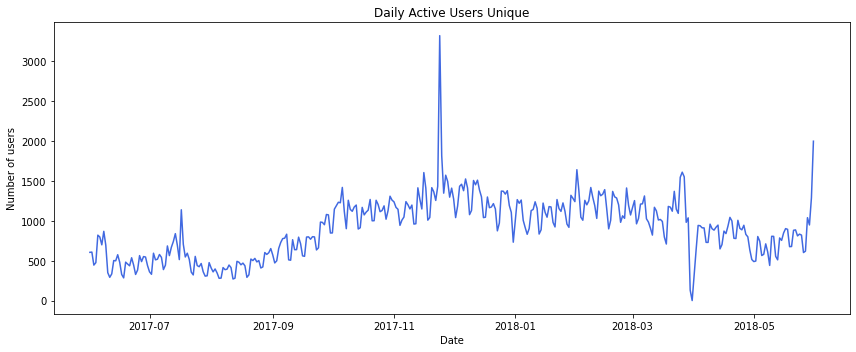

In [22]:
plt.figure(figsize=(12, 5))
plt.title('Daily Active Users Unique')
sns.lineplot(x='day',
            y='uid',
            data=dau,
            color='royalblue'
           )
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.tight_layout()
plt.show()


In [23]:
sticky_factor = dau_total/wau_total *100
sticky_factor

15.88440861589881

So we can see that the sticky factor is equal to 15.9%. We couldn't explicitly say that it's high, but we can say that it is lower than we want. The average sticky factor for messengers and networks is about 50%, while the average sticky factor for the game industry is about 20%. I think there's room for improvement. Let's check later what we can do about it.

##### How many sessions are there per day? (One user might have more than one session.)   <a class="anchor" id="re2"></a>

In [24]:
sessions_per_day = visits.groupby('day').agg({'uid': 'count'}).reset_index()
avg_sessions_per_day = sessions_per_day.mean()
print('Average sessions per day: {}'.format(int(avg_sessions_per_day)))

Average sessions per day: 987


In [25]:
avg_session_num_per_user = avg_sessions_per_day/dau_total
print('Average number of sessions per user: {}'.format(avg_session_num_per_user))

Average number of sessions per user: uid    1.087414
dtype: float64


The DAU is 907, which corresponds very well with the average number of sessions. About 0.8% of the users return to the site several times.

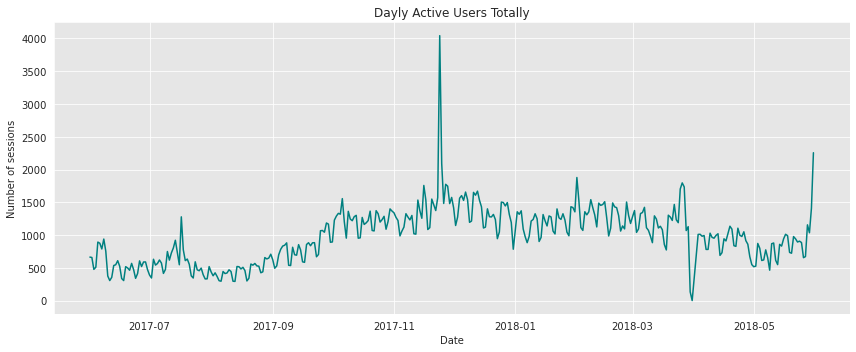

In [26]:
plt.figure(figsize=(12, 5))
plt.title('Dayly Active Users Totally')
sns.lineplot(x='day',
            y='uid',
            data=sessions_per_day,
            color='teal'
           )
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Date')
plt.ylabel('Number of sessions')
plt.tight_layout()
plt.show()



The chart is really similar to the chart of unique users. 

In [27]:
avg_sessions_per_touch = visits[visits['device']=='touch'].groupby('day').agg({'uid': 'count'}).mean()
print('Average number of sessions per user from touch: {}'.format(int(avg_sessions_per_touch)))

Average number of sessions per user from touch: 266


In [28]:
avg_sessions_per_desktop = visits[visits['device']=='desktop'].groupby('day').agg({'uid': 'count'}).mean()
print('Average number of sessions per user from desktop: {}'.format(int(avg_sessions_per_desktop)))

Average number of sessions per user from desktop: 721


As we can see, most users come from desktops, so all the site design changes, etc., should treat desktop as the priority. 
   These numbers might also reflect the users' age (with the hypotheses that older people used to work more from their desktops), or there might be some problems with the touch view of the cite. We don't have any info, but there's something to investigate.

##### What is the length of each session?<a class="anchor" id="re3"></a>

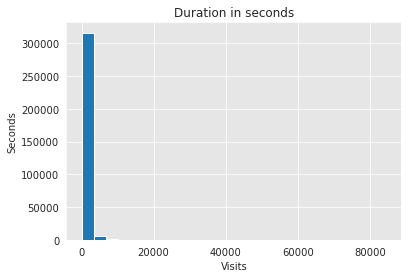

the mean duration is 11 minutes


In [29]:
visits['session_duration_sec'] = (visits['end ts'] - visits['start ts']).dt.seconds
visits = visits[visits['session_duration_sec']!= 0]
visits['session_duration_sec'].hist(bins=25)
plt.title('Duration in seconds')
plt.xlabel('Visits')
plt.ylabel('Seconds')
asl = visits['session_duration_sec'].mode()
plt.show()
asl_mean = int(visits['session_duration_sec'].mean()/60)
print('the mean duration is {} minutes'.format(asl_mean))

The distribution seem to be far from normal so i prefer to use mode value instead of mean.

In [30]:
print('The average visit duration is {} seconds.'.format(int(asl)))

The average visit duration is 60 seconds.


1 minute to buy tickets? Is it enough to buy a ticket for an event?

In [31]:
order_sess = orders.merge(visits, on ='uid')
order_sess = order_sess[order_sess['revenue'] !=0]
order_sess = order_sess[order_sess['session_duration_sec'] != 0]
print('the mean duration for an order session is {}'.format(int(order_sess.session_duration_sec.mean())))

the mean duration for an order session is 1329


So 22 minute, this value seem to be to big, let's check the distribution:

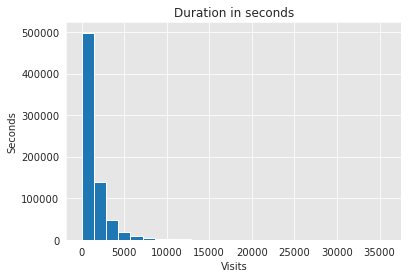

In [32]:
order_sess['session_duration_sec'].hist(bins=25)
plt.title('Duration in seconds')
plt.xlabel('Visits')
plt.ylabel('Seconds')
plt.show()

The distribution seems to be closer to normal but still far from it. So let's check what the mode value is:

In [33]:
print('the average duration for an order session is {}'.format(int(order_sess.session_duration_sec.mode())))

the average duration for an order session is 60


So 1 minute to buy a ticket seems to be enough!

In [34]:
device_dis=visits.groupby('device')['session_duration_sec'].mean().reset_index()
device_dis

,device,session_duration_sec
0,desktop,773.755834
1,touch,548.142125


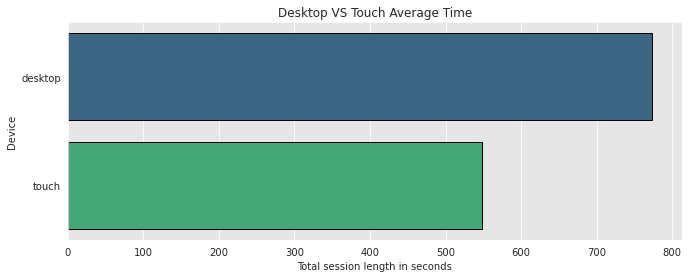

In [35]:

plt.figure(figsize=(11, 4))
plt.title('Desktop VS Touch Average Time')
sns.barplot(x='session_duration_sec',
            y='device',
            data=device_dis,
            palette="viridis",
            edgecolor='black'
)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Total session length in seconds')
plt.ylabel('Device')
plt.show()

We can see that from the desktop, the duration is much longer than the touch duration. 

In [36]:
device_dis=visits.groupby('device')['session_duration_sec'].sum().reset_index()

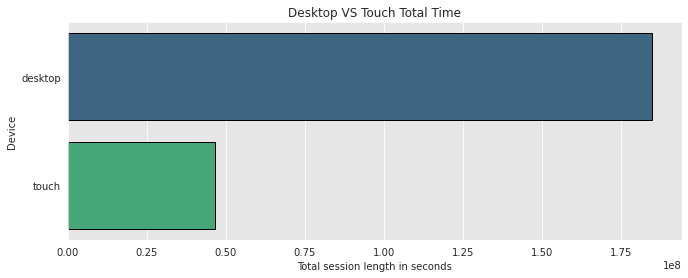

In [37]:
plt.figure(figsize=(11, 4))
plt.title('Desktop VS Touch Total Time')
sns.barplot(x='session_duration_sec',
            y='device',
            data=device_dis,
            palette="viridis",
            edgecolor='black'
)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.xlabel('Total session length in seconds')
plt.ylabel('Device')
plt.show()

And that the total sum of time spent in the different areas is different.

##### How often do users come back?<a class="anchor" id="re4"></a>

In [38]:
visit = visits[['day', 'uid']]
visits.head(1)

,device,end ts,source id,start ts,uid,year,month,week,day,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080


I have separated two columns for calculating the amount and time periods.

In [39]:
visits['day'] = pd.to_datetime(visits['day'])
first_visits = visits.groupby(['uid'])['day'].min().reset_index()
first_visits.name = 'first_visit'

In [40]:
first_visits.head()
first_visits.columns = ['uid', 'first_visit']

We have created the dataframe of the first visits for each unique user.

In [41]:
fvisits = visits.join(first_visits.set_index('uid'), on= 'uid')

We have joined the visits and first_visits dataframes over uid column.

In [42]:
fvisits['first_visit'] = fvisits['first_visit'].astype('datetime64[M]')
fvisits['visit_month'] = fvisits['day'].astype('datetime64[M]') 

We have updated columns first_visit and  created visit_month by changing their datatypes.

In [43]:
visits_grouped_by_cohorts = fvisits.groupby(['first_visit','visit_month']).agg({'uid':'nunique'}).reset_index()
visits_grouped_by_cohorts['cohort_lifetime'] = visits_grouped_by_cohorts['visit_month'] - visits_grouped_by_cohorts['first_visit']
display(visits_grouped_by_cohorts)

,first_visit,visit_month,uid,cohort_lifetime
0,2017-06-01,2017-06-01,11885,0 days
1,2017-06-01,2017-07-01,900,30 days
2,2017-06-01,2017-08-01,606,61 days
3,2017-06-01,2017-09-01,710,92 days
4,2017-06-01,2017-10-01,777,122 days
...,...,...,...,...
73,2018-03-01,2018-04-01,766,31 days
74,2018-03-01,2018-05-01,480,61 days
75,2018-04-01,2018-04-01,14215,0 days
76,2018-04-01,2018-05-01,675,30 days


We are grouping  by nunique to calculate users, and not purchases.

In [44]:
visits_grouped_by_cohorts['cohort_lifetime'] = visits_grouped_by_cohorts['cohort_lifetime'] / np.timedelta64(1,'M')

In [45]:
visits_grouped_by_cohorts['cohort_lifetime'] =  visits_grouped_by_cohorts['cohort_lifetime'].round().astype('int')

In [46]:
visits_grouped_by_cohorts['first_visit'] = visits_grouped_by_cohorts['first_visit'].dt.strftime('%Y-%m') 

In [47]:
cohorts = visits_grouped_by_cohorts #we'll need this table later 

In [48]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit','uid']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'}) 

In [49]:
cohorts = cohorts.merge(initial_users_count,on='first_visit') 

In [50]:
cohorts.columns = ['first_visit', 'visit_month', 'uid_month', 'cohort_lifetime', 'uid_init']
cohorts.head() 

,first_visit,visit_month,uid_month,cohort_lifetime,uid_init
0,2017-06,2017-06-01,11885,0,11885
1,2017-06,2017-07-01,900,1,11885
2,2017-06,2017-08-01,606,2,11885
3,2017-06,2017-09-01,710,3,11885
4,2017-06,2017-10-01,777,4,11885


In [51]:
cohorts['retention'] = cohorts['uid_month']/cohorts['uid_init'] 


In [52]:
retention_pivot = cohorts.pivot_table(index='first_visit',columns='cohort_lifetime',values='retention',aggfunc='sum')

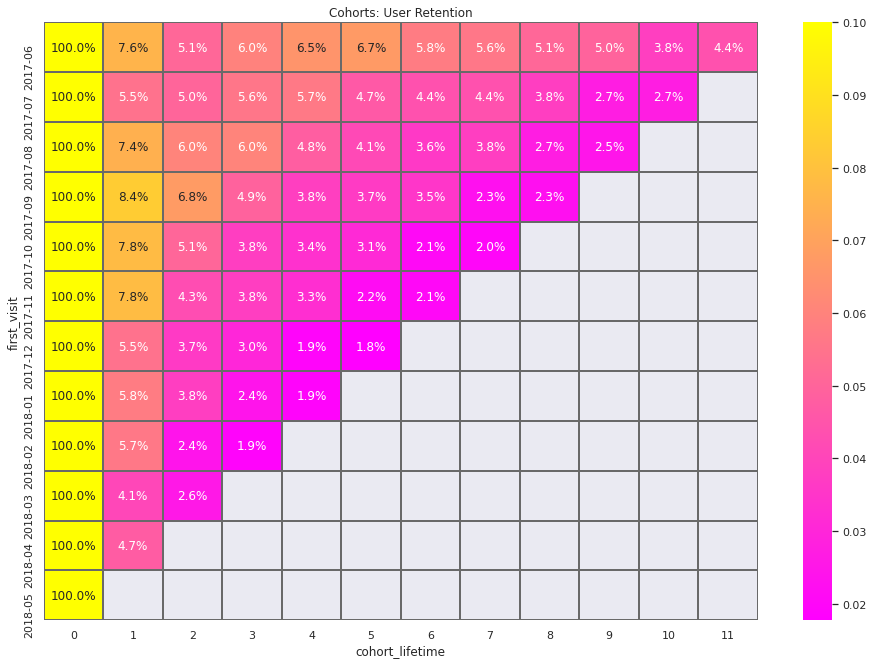

In [53]:
sns.set(style='darkgrid')
plt.figure(figsize=(16, 11))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmax = .1, linewidths=1, linecolor='dimgray', cmap = 'spring'); 

We have calculated the retention rate per month as we can see a very small percentage use to return even though each month we have a relatively big number of new visitors. Even though the number of returning customers is small, I suggest that this number is the number of customers who ordered products and returned for more. We can also notice that in the cohorts of winter months of 2017, the retention rate seems to be higher, which corresponds with the general pattern of buying more in the winter and participating in more closed events.

#### Conclusion  Product    <a class="anchor" id="c2"></a>

- Average unique visits per month- 23228, per week -5716, per day: 907. These are the absolute numbers, the relative number, such as sticky factor equals 15.9%, and there might be an improvement. 
- There are 987 visits per day,  721 visits from the desktop, and 266 visits from touch. 
- The average session length is 60 seconds, which seems to be enough time to make a purchase. The mean time of visit is nine minutes.
- The users' retention rate depends on the month and time of the year but never exceeds 9%. 

#### 2. Sales  <a class="anchor" id="s22"></a>

####    When do people start buying?  <a class="anchor" id="qq3"></a>

In [54]:
orders['order_date'] = orders['buy ts'].dt.date
orders['order_date'] = pd.to_datetime(orders['order_date'])
first_orders = orders.groupby(['uid'])['order_date'].min().reset_index()
vis_ord = first_orders.merge(first_visits, on ='uid')
vis_ord['conversion'] = vis_ord['order_date'] - vis_ord['first_visit']

In [55]:
vis_ord['conversion'] = vis_ord['conversion'].dt.days.astype('int')

Text(0, 0.5, 'Days')

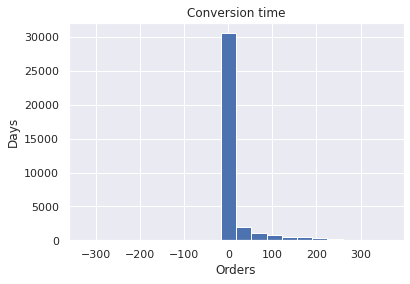

In [56]:
vis_ord['conversion'].hist(bins =20)
plt.title('Conversion time')
plt.xlabel('Orders')
plt.ylabel('Days')

In [57]:
vis_ord['conversion'].mode()

0    0
dtype: int64

As we can see, most users buy products at the first entrance to the site, while there are users who used to purchase products in more than 150 days. This means that people who come to buy events already know what they want to buy, and they don't look for information about the event, which corresponds well with the average time of purchase which is 60 seconds.

##### How many orders do they make during a given period of time?  <a class="anchor" id="qq2"></a>

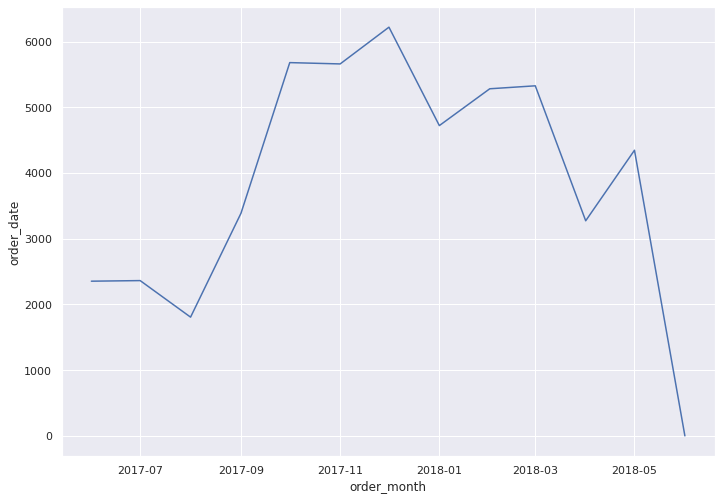

In [58]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')

orders['order_date'] = pd.to_datetime(orders['order_date'])
orders_count = orders.groupby('order_month')['order_date'].count().reset_index()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax, data = orders_count, x = 'order_month', y = 'order_date', dashes=False)

plt.show()


As we can see the highest peak of the orders happens to be near the new years eve, after that the sales experience decline. This might be connected to the specifics of the celebrations and winter season, but I suppose that it can be explained better by the particulars of the citizen's lifestyle. Winter months, most of them might spend in the city, so more events might interest the clients, while in the summertime, they might mostly spend out of the town. Therefore there's a decline in orders. Let's have a look at the same picture by days:

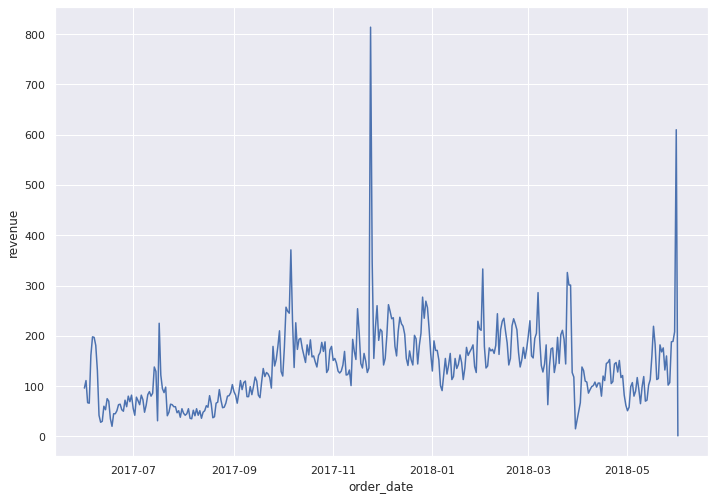

In [59]:
orders_count = orders.groupby('order_date')['revenue'].count().reset_index()
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(ax=ax, data = orders_count, x = 'order_date', y = 'revenue', dashes=False)

plt.show()

This picture can show us more accurate specifics of the orders during the given period. We can see that the line most of the time fluctuates at  50-300 orders per day, with the peak of 820 orders at the winter celebrations and vacation time. 

In [60]:
ordo=orders.groupby('uid')['order_date'].count().reset_index()
ordo.columns =['uid', 'total_ordrs']
print(np.percentile(ordo['total_ordrs'], [90, 95, 99])) 

[2. 3. 5.]


We can say that 90% of the user have less than two orders, 95% less than 3%, and 99% of users have less than five orders during the whole given period. Let's have a look at the half a year:

In [61]:
orders['year'] = orders['buy ts'].dt.year
ordo7=orders[orders['year'] ==2017].groupby('uid')['order_date'].count().reset_index()
ordo7.columns =['uid', 'total_ordrs']
ordo8=orders[orders['year'] ==2018].groupby('uid')['order_date'].count().reset_index()
ordo8.columns =['uid', 'total_ordrs']

In [62]:
print(np.percentile(ordo7['total_ordrs'], [90, 95, 99])) 

[2. 2. 4.]


In [63]:
print(np.percentile(ordo8['total_ordrs'], [90, 95, 99])) 

[2. 2. 4.]


As we can see, for half a year(as we have only half of 2017 and 2018 present in our data), the result is even smaller—99% of the users made less than four orders.

In [64]:
print('average amount of orders in 2017 is {}'.format(round(ordo7.total_ordrs.mean(),2)))
print('average amount of orders in 2018 is {}'.format(round(ordo8.total_ordrs.mean(),2)))

average amount of orders in 2017 is 1.33
average amount of orders in 2018 is 1.32


According to the previous graph, the difference might be explained with the new year's eve and seasonal celebrations, time right before the new year is the highest peak of sales.

##### What is the average purchase size? <a class="anchor" id="qq3"></a>

In [65]:
orders.revenue.describe()

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

0    1.83
dtype: float64

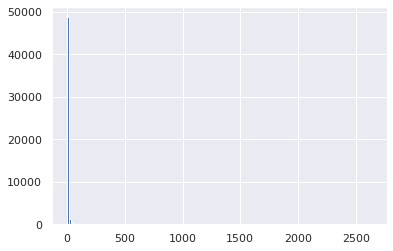

In [66]:
orders_rev = orders.groupby('order_month')['revenue'].sum().reset_index()
orders['revenue'].hist(bins = 150)
orders.revenue.mode()

In [67]:
purch_by_month = int(orders_rev.revenue.mean())
purch_by_user = int(orders.revenue.mean())
print('the total mean purchase for month {}'.format(purch_by_month) )
print('the mean purchase for day {}'.format(purch_by_user) )

the total mean purchase for month 19389
the mean purchase for day 4


As the distribution of the revenues is far from normal i prefer to assign the mode value (1.83) as an average profit.

#####    How much money do they bring? (LTV) <a class="anchor" id="qq4"></a>

In [68]:
def sixth_month(data):
    for data[1] in data:
        return datetime.datetime.strptime(data[1], "%Y-%m-%d")  + dateutil.relativedelta.relativedelta(months=6)

In [69]:
first_orders = orders.groupby('uid').agg({'buy ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
#first_otders['6-th_month'] = first_orders.apply(sixth_month, axis = 1) 
first_orders.first_order_month = first_orders['first_order_month'].dt.strftime('%Y-%m')
first_orders.head() 

,uid,first_order_month
0,313578113262317,2018-01
1,1575281904278712,2017-06
2,2429014661409475,2017-10
3,2464366381792757,2018-01
4,2551852515556206,2017-11


We have grouped orders to reckognize when the first purchase happened for each user.

In [70]:
orders_ = pd.merge(first_orders, orders, on='uid')
orders_.head()

,uid,first_order_month,buy ts,revenue,order_date,order_month,year
0,313578113262317,2018-01,2018-01-03 21:51:00,0.55,2018-01-03,2018-01-01,2018
1,1575281904278712,2017-06,2017-06-03 10:13:00,1.22,2017-06-03,2017-06-01,2017
2,1575281904278712,2017-06,2017-06-03 17:39:00,1.83,2017-06-03,2017-06-01,2017
3,2429014661409475,2017-10,2017-10-11 18:33:00,73.33,2017-10-11,2017-10-01,2017
4,2464366381792757,2018-01,2018-01-28 15:54:00,2.44,2018-01-28,2018-01-01,2018


In [71]:
ltv = orders_.groupby(['first_order_month']).agg({'revenue': 'sum', 'uid':'nunique'}).reset_index()
ltv.rename(columns = {'uid':'n_buyers'}, inplace=True)
ltv

,first_order_month,revenue,n_buyers
0,2017-06,24031.69,2023
1,2017-07,16127.92,1923
2,2017-08,11606.26,1370
3,2017-09,34676.32,2581
4,2017-10,27603.45,4340
5,2017-11,26098.99,4081
6,2017-12,33485.74,4383
7,2018-01,16663.13,3373
8,2018-02,16750.50,3651
9,2018-03,19273.41,3533


We have calculated the total revenue each cohort brought to the Afisha for a given period of time.

In [72]:
ltv['ltv'] = ltv['revenue'] / ltv['n_buyers']
ltv['ltv'] = ltv['ltv'].round(2)
ltv

,first_order_month,revenue,n_buyers,ltv
0,2017-06,24031.69,2023,11.88
1,2017-07,16127.92,1923,8.39
2,2017-08,11606.26,1370,8.47
3,2017-09,34676.32,2581,13.44
4,2017-10,27603.45,4340,6.36
5,2017-11,26098.99,4081,6.40
6,2017-12,33485.74,4383,7.64
7,2018-01,16663.13,3373,4.94
8,2018-02,16750.50,3651,4.59
9,2018-03,19273.41,3533,5.46


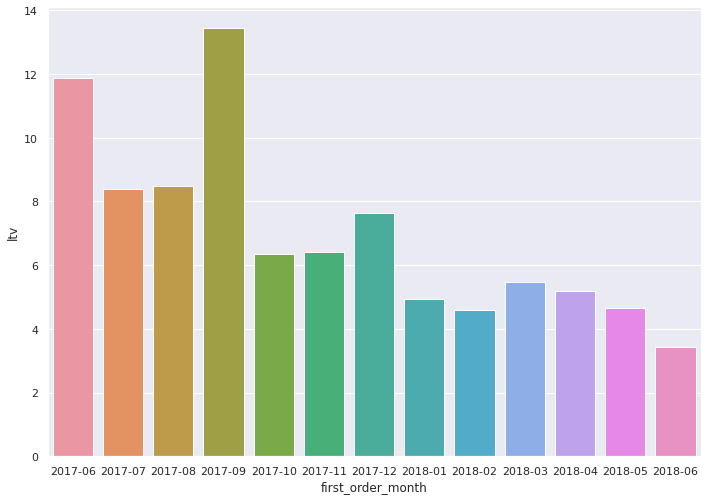

In [73]:
#sns.set_theme(style="whitegrid")
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data = ltv, x ="first_order_month", y = 'ltv')
plt.show()

In [74]:
ltv_total = ltv['ltv'].mean()
ltv_cumsum_total = np.cumsum(ltv['ltv']).mean()
print(round(ltv_total, 2))
print(round(ltv_cumsum_total, 2))

6.99
57.49


In [75]:
ltv_ = orders_.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index()
#ltv_.rename(columns = {'uid':'n_buyers'}, inplace=True)
report = pd.merge(ltv, ltv_, on='first_order_month')
report = report.drop('revenue_x', axis =1) 
report = report.rename(columns = {'revenue_y':'revenue'})

In [76]:
report['age'] = (report['order_month'].astype('datetime64[M]')  - report['first_order_month'].astype('datetime64[M]') ) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [77]:
report['ltv'] = report['revenue'] / report['n_buyers']

In [78]:
report_6_months = report[(report['first_order_month'].astype('datetime64[M]')<='2017-11-01')]
report_6_months =report_6_months[report_6_months['age'] <=6]
output = report_6_months.pivot_table(
    index= 'first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round()

output.cumsum(axis=1, skipna=False)

age,0,1,2,3,4,5,6
first_order_month,,,,,,,
2017-06,5.0,5.0,5.0,6.0,7.0,8.0,9.0
2017-07,6.0,6.0,7.0,7.0,7.0,7.0,7.0
2017-08,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2017-09,6.0,7.0,8.0,12.0,12.0,13.0,14.0
2017-10,5.0,6.0,6.0,6.0,6.0,6.0,6.0
2017-11,5.0,5.0,5.0,5.0,5.0,5.0,5.0


We have used cumsum to see the accumulated lifetime value for each cohort over the six months period.

In [79]:
report_6_months = report_6_months.groupby('first_order_month').agg({'ltv':'sum'}).reset_index()

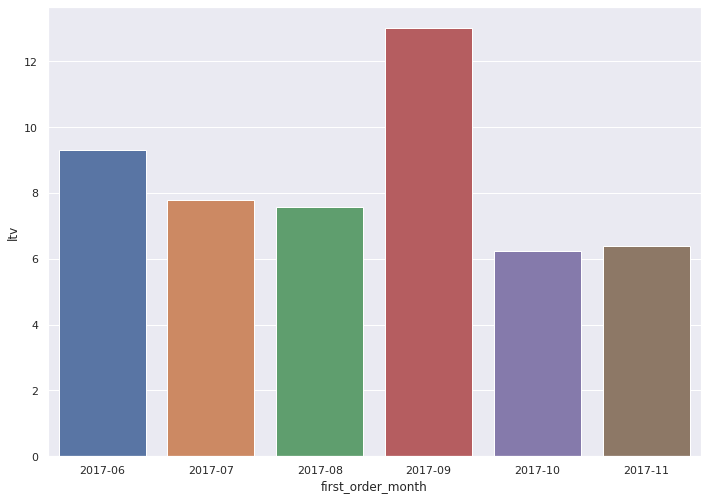

In [80]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data = report_6_months , x ="first_order_month", y = 'ltv')
plt.show()

The general tendency is in lowering the ltv in the perspective of six months. The only anomaly is 2017-09, which might be connected with the beginning of the school year. For investigating this anomaly, we need more information. 

In [81]:
ltv_total = report_6_months['ltv'].mean()
ltv_total

8.387686429758396

Unfortunately, we don't know the margin rate, so that we couldn't calculate the gross profit. The average purchase for each customer seems to cost about 7$. Most people don't seem to come back after ordering the tickets, which we have already noticed.

#### Conclusion Sales  <a class="anchor" id="c3"></a>

- Most users buy products at the first entrance to site, while there are users who used to purchase products in more than 150 days. This means that people who come to buy events already know what they want to buy, and they don't look for the information about the event at the site. This corresponds well with the average time of purchase which is 60 seconds.
- Most of the time, there are 50-300 orders per day, with a peak of 820 orders at the winter celebrations and vacation time. 
- The average purchase size equals 1.83
- The average lifetime value equals 6.99, but it varies from month to month with the peaks of 12 and 13$ at 6-th and 9-th months, consequently

#### 3.  Marketing  <a class="anchor" id="s23"></a>

#####    How much money was spent? Overall/per source/over time <a class="anchor" id="mm1"></a>

In [82]:
costs['month'] = costs['dt'].dt.strftime('%Y-%m') 
print('The overall money spent is: {}$'.format(costs.costs.sum())) 

The overall money spent is: 329131.62$


In [83]:
costs_source = costs.groupby('source_id')['costs'].sum().reset_index()

print('The total costs by source are: {}$'.format(round(costs_source.costs.mean(), 1)))

The total costs by source are: 47018.8$


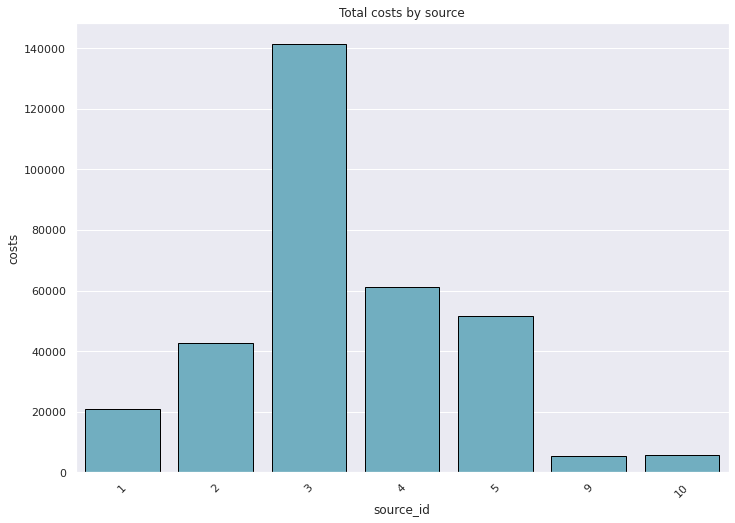

In [84]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data = costs_source, x ="source_id", y = 'costs', edgecolor = 'black', color = 'c')
plt.title('Total costs by source')
plt.xticks(rotation= 45)
plt.show()

Most of the money spent on the 3rd source, which is the second biggest source by the number of users it brings, but the first most significant source, costs much cheaper. We shall continue to observe the sources with the cac values.

In [85]:
costs_month = costs.groupby('month')['costs'].sum().reset_index()
print('The total costs by month are: {}$'.format(round(costs_month.costs.mean(), 1)))

The total costs by month are: 27427.6$


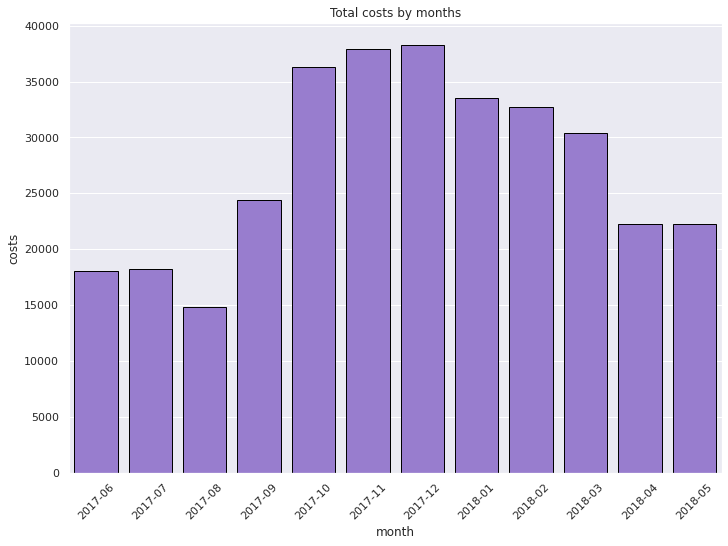

In [86]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data = costs_month, x ="month", y = 'costs', edgecolor = 'black', color = 'mediumpurple')
plt.title('Total costs by months')
plt.xticks(rotation= 45)
plt.show()

The general picture fits, to the previous graphs- peak activity at the winter months and decline at the summer.

#####   How much did customer acquisition from each of the sources cost? <a class="anchor" id="mm2"></a>

In [87]:
visits_source = visits.groupby('source id').uid.nunique().reset_index()
visits_source.rename(columns = {'source id':'source_id'}, inplace = True)
visits_source

,source_id,uid
0,1,17960
1,2,24152
2,3,67284
3,4,75080
4,5,50921
5,6,5
6,7,33
7,9,8504
8,10,7208


We need to calculate the costs that were spent on getting the users from each source. For that purpose, I have recalculated the number of unique users in the visits table grouped by source and then merged this new table with the costs table after grouping it by source id.

In [88]:
source_cac = pd.merge(visits_source, costs_source, on = 'source_id')
source_cac['cac'] = source_cac['costs']/source_cac['uid']
source_cac

,source_id,uid,costs,cac
0,1,17960,20833.27,1.159982
1,2,24152,42806.04,1.772360
2,3,67284,141321.63,2.100375
3,4,75080,61073.60,0.813447
4,5,50921,51757.10,1.016420
5,9,8504,5517.49,0.648811
6,10,7208,5822.49,0.807782


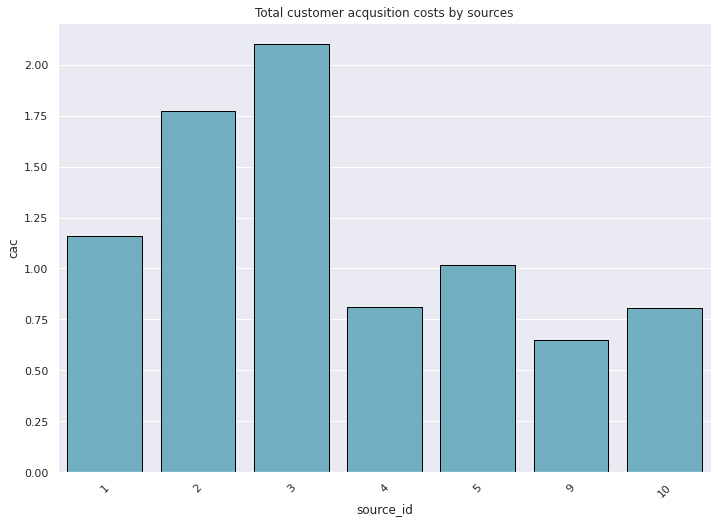

In [89]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data =source_cac, x ="source_id", y = 'cac', edgecolor = 'black', color = 'c')
plt.title('Total customer acqusition costs by sources')
plt.xticks(rotation= 45)
plt.show()

In [90]:
print("the average customer acquisition value by source equals: {}".format(round(source_cac.cac.mean(), 2)))

the average customer acquisition value by source equals: 1.19


Unfortunately, we don't know the source ids' meanings and can describe only the primary picture of the source cac distribution.  The source id 2 costs the company at least twice as any other source while providing not so many users. We should look into this source and investigate what the reason for such costs is. Also, explore if there a potential to provide more users from sources 5 and 6, which provide us with a relatively small representation of users while having the smallest cac.

Calculating the cac for a month is a very similar process.

In [91]:
orders

,buy ts,revenue,uid,order_date,order_month,year
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2018


In [92]:
orders['month'] = orders['order_month'].dt.strftime('%Y-%m')

In [93]:
orders_month = orders.groupby('month').uid.nunique().reset_index()

In [94]:
month_cac = pd.merge(orders_month, costs_month, on = 'month')
month_cac['cac'] = month_cac['costs']/month_cac['uid']
month_cac

,month,uid,costs,cac
0,2017-06,2023,18015.00,8.905091
1,2017-07,1984,18240.59,9.193846
2,2017-08,1472,14790.54,10.047921
3,2017-09,2750,24368.91,8.861422
4,2017-10,4675,36322.88,7.769600
5,2017-11,4547,37907.88,8.336899
6,2017-12,4942,38315.35,7.753005
7,2018-01,3898,33518.52,8.598902
8,2018-02,4258,32723.03,7.685070
9,2018-03,4181,30415.27,7.274640


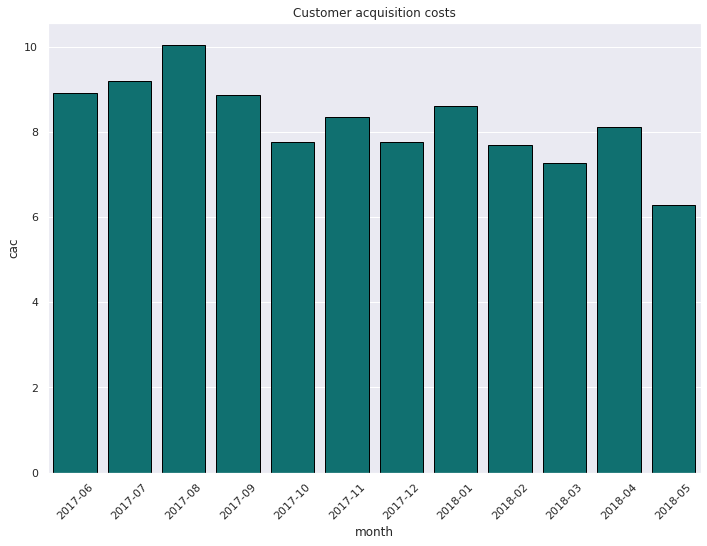

In [95]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax, data = month_cac, x ="month", y = 'cac', edgecolor = 'black', color = 'teal')
plt.title('Customer acquisition costs')
plt.xticks(rotation= 45)
plt.show()

In [96]:
print("the average customer acquisition value by month equals: {}".format(round(month_cac.cac.mean(), 2)))

the average customer acquisition value by month equals: 8.24


##### How worthwhile were the investments? (ROI) <a class="anchor" id="mm3"></a>

ROI(ROMI) by source - divide LTV by source/CAC by source

In [97]:
month_cac['month'] = month_cac['month'].astype('datetime64[M]')
month_cac.rename(columns={'month':'order_month'}, inplace=True)
report
month_cac

,order_month,uid,costs,cac
0,2017-06-01,2023,18015.00,8.905091
1,2017-07-01,1984,18240.59,9.193846
2,2017-08-01,1472,14790.54,10.047921
3,2017-09-01,2750,24368.91,8.861422
4,2017-10-01,4675,36322.88,7.769600
5,2017-11-01,4547,37907.88,8.336899
6,2017-12-01,4942,38315.35,7.753005
7,2018-01-01,3898,33518.52,8.598902
8,2018-02-01,4258,32723.03,7.685070
9,2018-03-01,4181,30415.27,7.274640


In [98]:
romi = pd.merge(report, month_cac, on='order_month')

In [99]:
romi['romi'] = romi['ltv']/romi['cac']

In [100]:
output = romi.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output = output.cumsum(axis=1).round(2) 
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,0.53,0.58,0.63,0.73,0.87,0.95,1.08,1.14,1.22,1.3,1.37,1.41
2017-07,0.65,0.69,0.76,0.8,0.82,0.84,0.86,0.88,0.9,0.92,0.94,
2017-08,0.53,0.58,0.64,0.68,0.75,0.78,0.81,0.86,0.9,0.93,,
2017-09,0.64,0.78,0.84,1.36,1.4,1.49,1.58,1.61,1.64,,,
2017-10,0.64,0.71,0.73,0.75,0.77,0.79,0.8,0.82,,,,
2017-11,0.62,0.67,0.69,0.74,0.76,0.76,0.78,,,,,
2017-12,0.61,0.64,0.76,0.91,0.95,1,,,,,,
2018-01,0.48,0.52,0.56,0.58,0.59,,,,,,,
2018-02,0.54,0.58,0.59,0.6,,,,,,,,


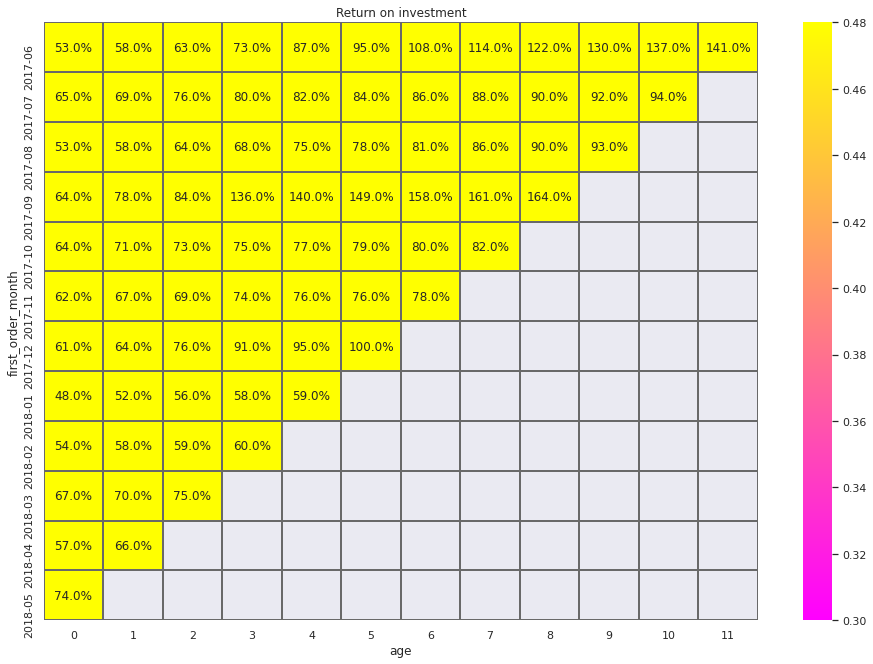

In [101]:
sns.set(style='darkgrid')
plt.figure(figsize=(16, 11))
plt.title('Return on investment')
sns.heatmap(output, annot=True, fmt='.01%', vmax = .3, linewidths=1, linecolor='dimgray', cmap = 'spring'); 

As we can see, the global tendency is that the investment doesn't return. In the 6-th column, which represents the 6-th month of the column, lifetime romi only once exceeds  100%. On the scale of one year, the romi remains negative, but the picture might be different for several years. 

#### Conclusion Marketing <a class="anchor" id="c4"></a>

- 329131.62 spent in total, 47018.8 average spent by the source during the whole year, and 27427.6 average spent by month.
- The average value of the cac by source equals 1.19, and by month 1.33, with the peak of 1.5 in June of 2017.
- There were only two months during the given period when the investments fully returned to the company in June and September of 2017. In every other case, investments didn't return.
   


# Step 3. Write a conclusion: advise marketing experts how much money to invest and where. <a class="anchor" id="st3"></a>

We have overlooked the data on the logs visits, costs, and orders of the Yandex Afisha from the June of 2017 till the May of 2018. There are some concerns on the company profitability. But let's first discuus the metrics we were focusing on:


  
    Average unique visits per month- 23228, per week -5716, per day: 907. These are the absolute numbers, the relative number, such as sticky factor equals 15.9%, and there might be an improvement.
    There are 987 visits per day totally, 721 visits from the desktop, and 266 visits from touch.
    The average session length is 60 seconds, which seems to be enough time to make a purchase. The mean time of visit is nine minutes.
    The users' retention rate depends on the month and time of the year but never exceeds 9%.



            Most users buy products at the first entrance to cite, and among them, some users used to purchase products in more than 150 days. This means that people who come to buy events already know what they want to buy, and they don't look for information about the event at the site. This corresponds well with the average time of purchase which is 60 seconds.
    There are 50-300 orders per day, with a peak of 820 orders at the winter celebrations and vacation time.
    The average purchase size equals 1.83
    The average lifetime value equals 6.99, but it varies from month to month with the peaks of 12 and 13$ at 6-th and 9-th months, consequently.





    329131.62 spent in total, 47018.8 average spent by the source during the whole year, and 27427.6 average spent by month.
    The average value of the cac by source equals 1.19, and by month 1.33, with the peak of 1.5 in June of 2017.
    There were only two months during the given period when the investments fully returned to the company in June and September of 2017. In every other case, investments didn't return.




So for increasing profitability there's a need to concentrate on the promotions. Need to recheck the sources, reinvest in the chepaer sources and recheck the relation with the most expensive ones (for exmaple source with the source_id 3). Let's calculate how many clients per day do we need to return to profitability:

We don't have the info about the fixed expenses, so we can describe only the situation with our current expenses.

In [105]:
expenses_total = costs.costs.sum()
profit_total = orders.revenue.sum()
profit_count = orders.revenue.count()
difference = profit_total - expenses_total
print(round(difference, 2))
average_ltv = ltv.ltv.mean()
average_cac = 1.19
#difference = x*(average_ltv - avarage_cac)
total_revenue_to_become_profitable = difference/(average_ltv - average_cac)
clients_num = total_revenue_to_become_profitable/average_ltv  
print('For becoming profitable there is a need to acquire {} new clients per year'.format(int(-1*clients_num)+1))

-77074.42
For becoming profitable there is a need to acquire 1903 new clients per year


In the table for the total costs per sources we could see that the most expensive resource (id =3) brings us the second number of users. While the most profitable source(id=4) with the almost the lowest customer acquision so we should reconsider the money spent on different resources and try to increase the spent on the most profitable resources like (id=4) and lower it on the expensive ones.
